# Graphs and trees to navigate between higher dimensional data

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image

In [ ]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors

In [ ]:
from IPython.display import Image as iImage
from IPython.display import display

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [ ]:
benchFiles = os.listdir('/content/drive/MyDrive/Colab Notebooks/04_DesignAlgorithms/bench_in_istanbul')

In [ ]:
benchFiles

['benchinistanbul0.jpeg',
 'benchinistanbul1.jpeg',
 'benchinistanbul2.jpeg',
 'benchinistanbul3.jpeg',
 'benchinistanbul6.jpeg',
 'benchinistanbul4.jpeg',
 'benchinistanbul7.jpeg',
 'benchinistanbul5.jpeg',
 'benchinistanbul9.jpeg',
 'benchinistanbul8.jpeg',
 'benchinistanbul10.jpeg',
 'benchinistanbul11.jpeg',
 'benchinistanbul12.jpeg',
 'benchinistanbul14.jpeg',
 'benchinistanbul17.jpeg',
 'benchinistanbul15.jpeg',
 'benchinistanbul16.jpeg',
 'benchinistanbul13.jpeg',
 'benchinistanbul18.jpeg',
 'benchinistanbul20.jpeg',
 'benchinistanbul19.jpeg',
 'benchinistanbul21.jpeg',
 'benchinistanbul22.jpeg',
 'benchinistanbul23.jpeg',
 'benchinistanbul25.jpeg',
 'benchinistanbul26.jpeg',
 'benchinistanbul24.jpeg',
 'benchinistanbul29.jpeg',
 'benchinistanbul28.jpeg',
 'benchinistanbul30.jpeg',
 'benchinistanbul31.jpeg',
 'benchinistanbul27.jpeg',
 'benchinistanbul33.jpeg',
 'benchinistanbul32.jpeg',
 'benchinistanbul34.jpeg',
 'benchinistanbul35.jpeg',
 'benchinistanbul38.jpeg',
 'benchinis

In [ ]:
features = []
for m in benchFiles:
    path = os.path.join('/content/drive/MyDrive/Colab Notebooks/04_DesignAlgorithms/bench_in_istanbul', m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 68ms/step


In [ ]:
nbrs = NearestNeighbors(n_neighbors = 8, algorithm='auto').fit(features)
distances, indices = nbrs.kneighbors(features)

In [ ]:
indices

array([[  0,   3,  18, ..., 152, 184, 116],
       [  1,  48,  23, ...,   7, 184,  10],
       [  2,  61,  37, ...,  52,   6,  85],
       ...,
       [189, 142,  39, ...,  31,  97, 133],
       [190,  10,  24, ...,  25, 109,  72],
       [191,  16,  62, ...,  31,  34,  18]])

In [ ]:
def showNearestNeighbours(index, indices, files, path):
    for i in indices[index]:
        f = files[i]
        print(f)
        display(iImage(filename = os.path.join(path, f)))

benchinistanbul9.jpeg


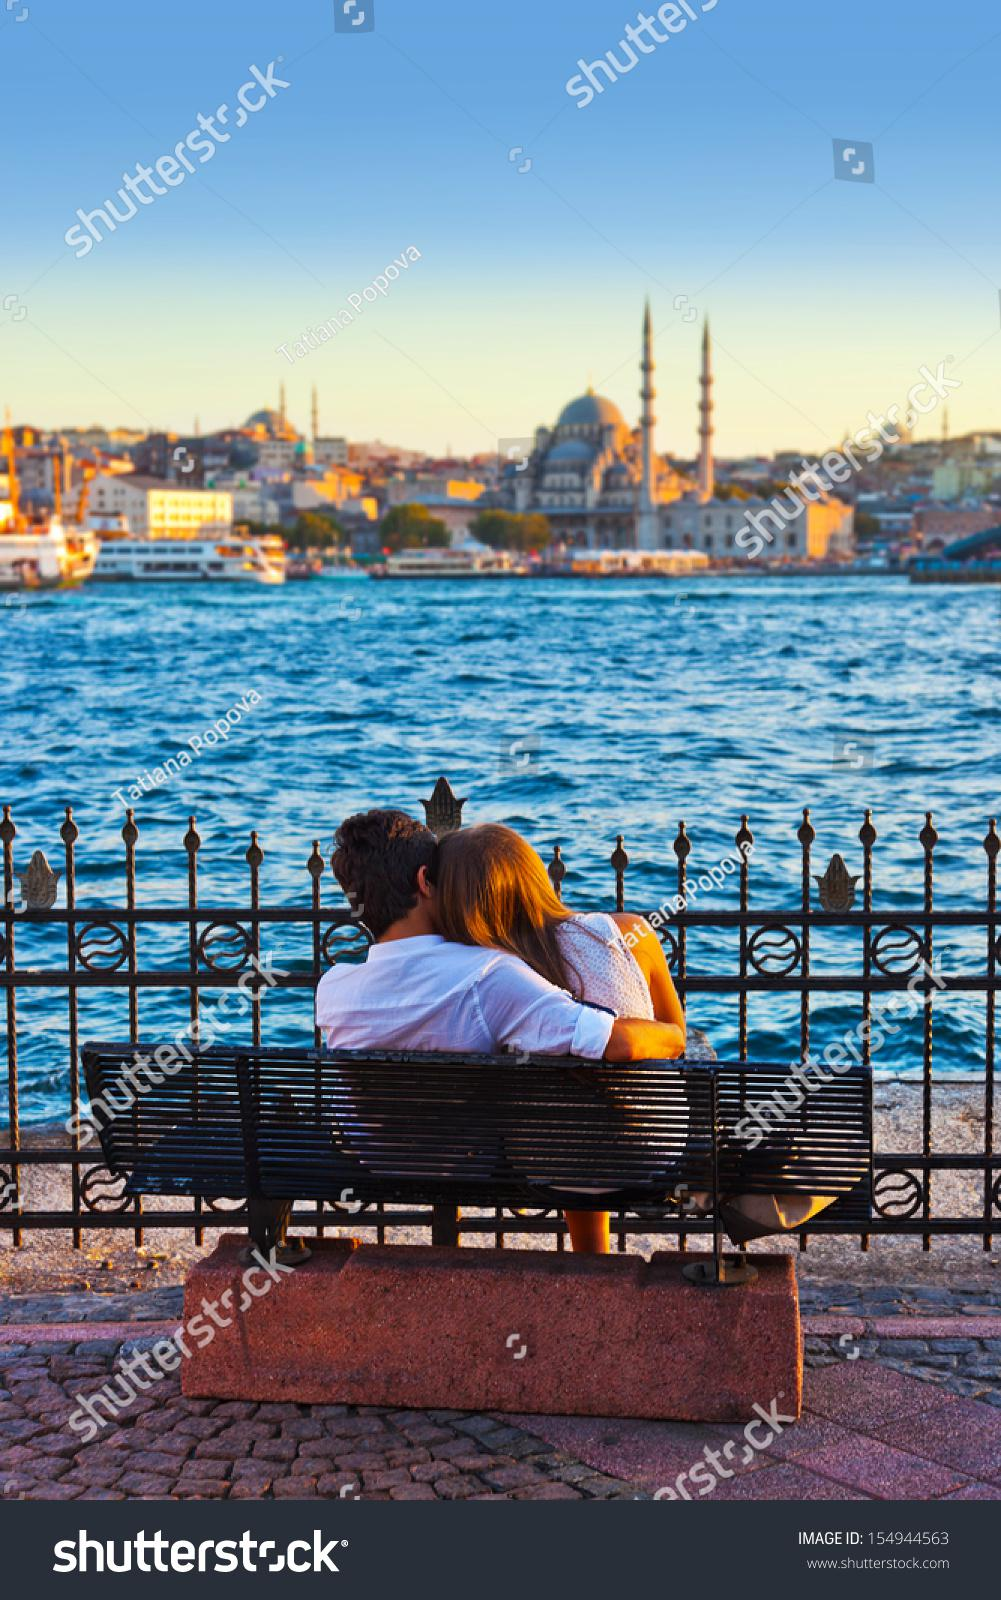

benchinistanbul188.jpeg


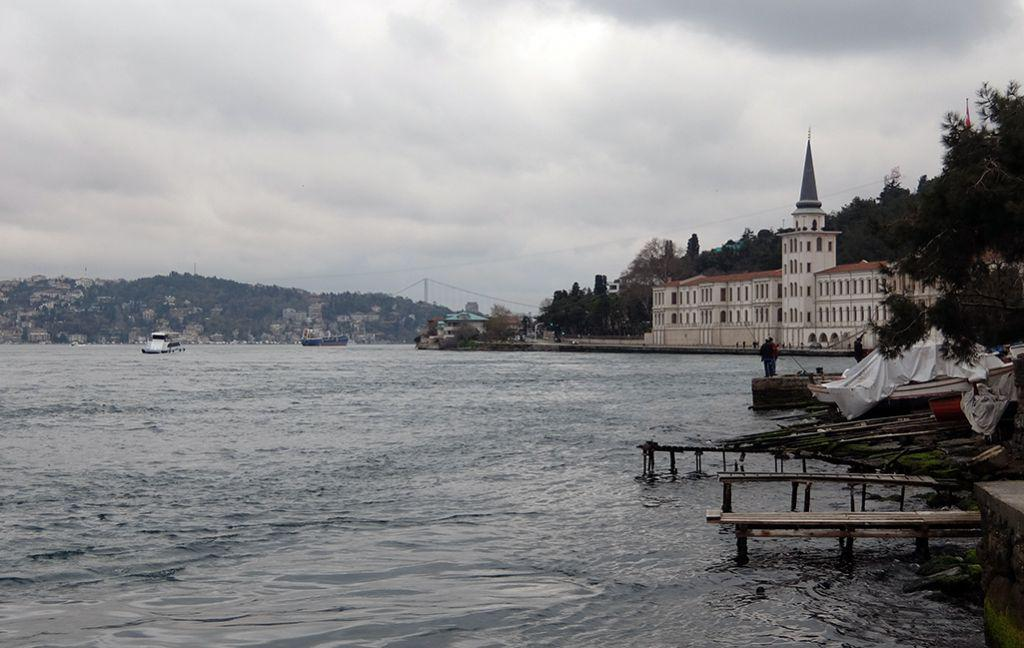

benchinistanbul15.jpeg


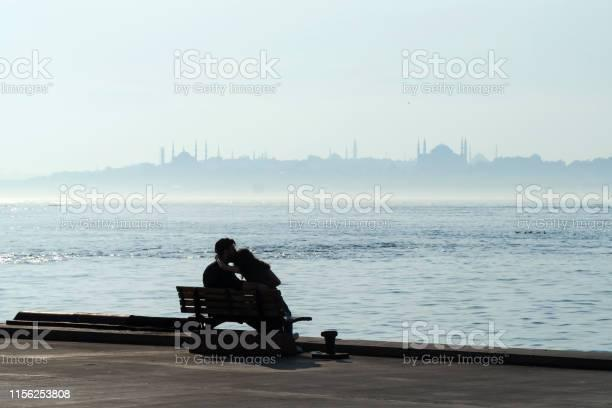

benchinistanbul184.jpeg


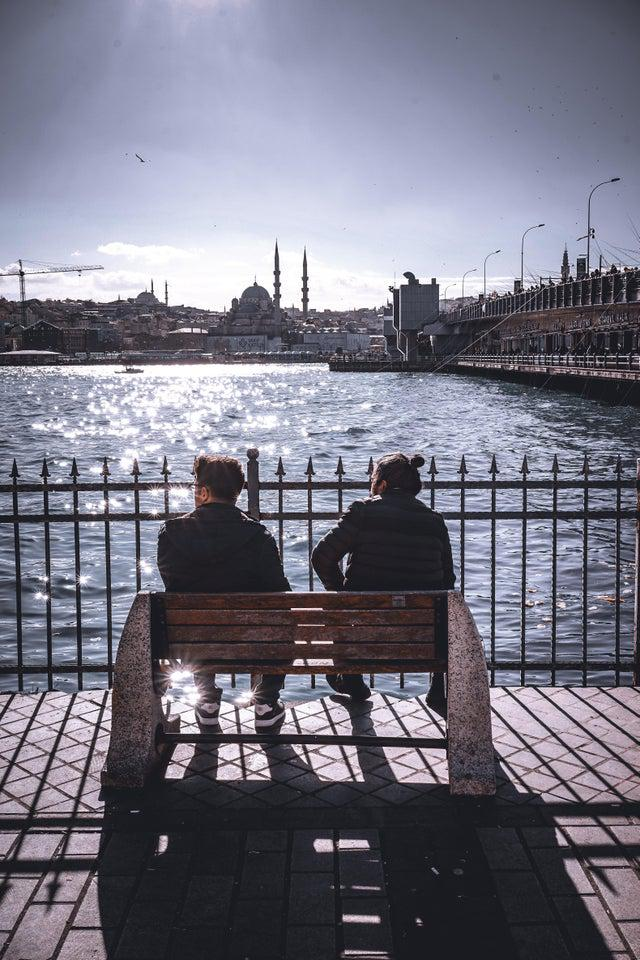

benchinistanbul17.jpeg


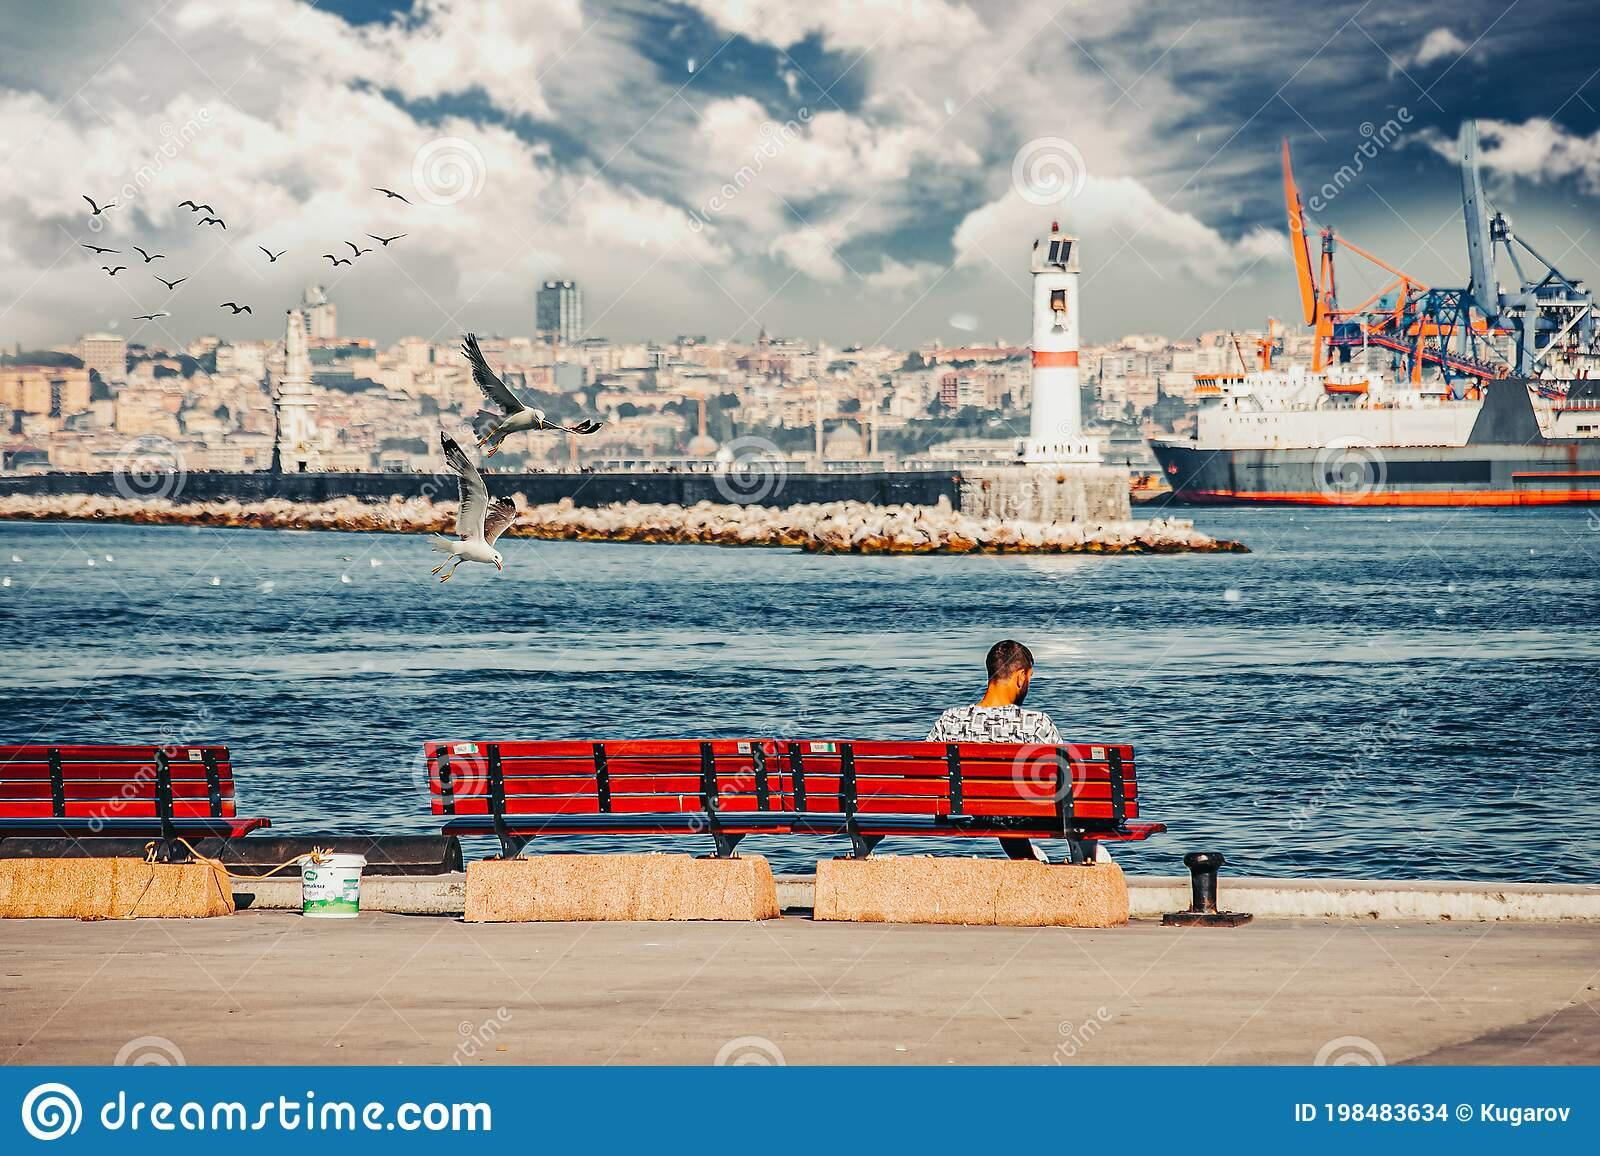

benchinistanbul72.jpeg


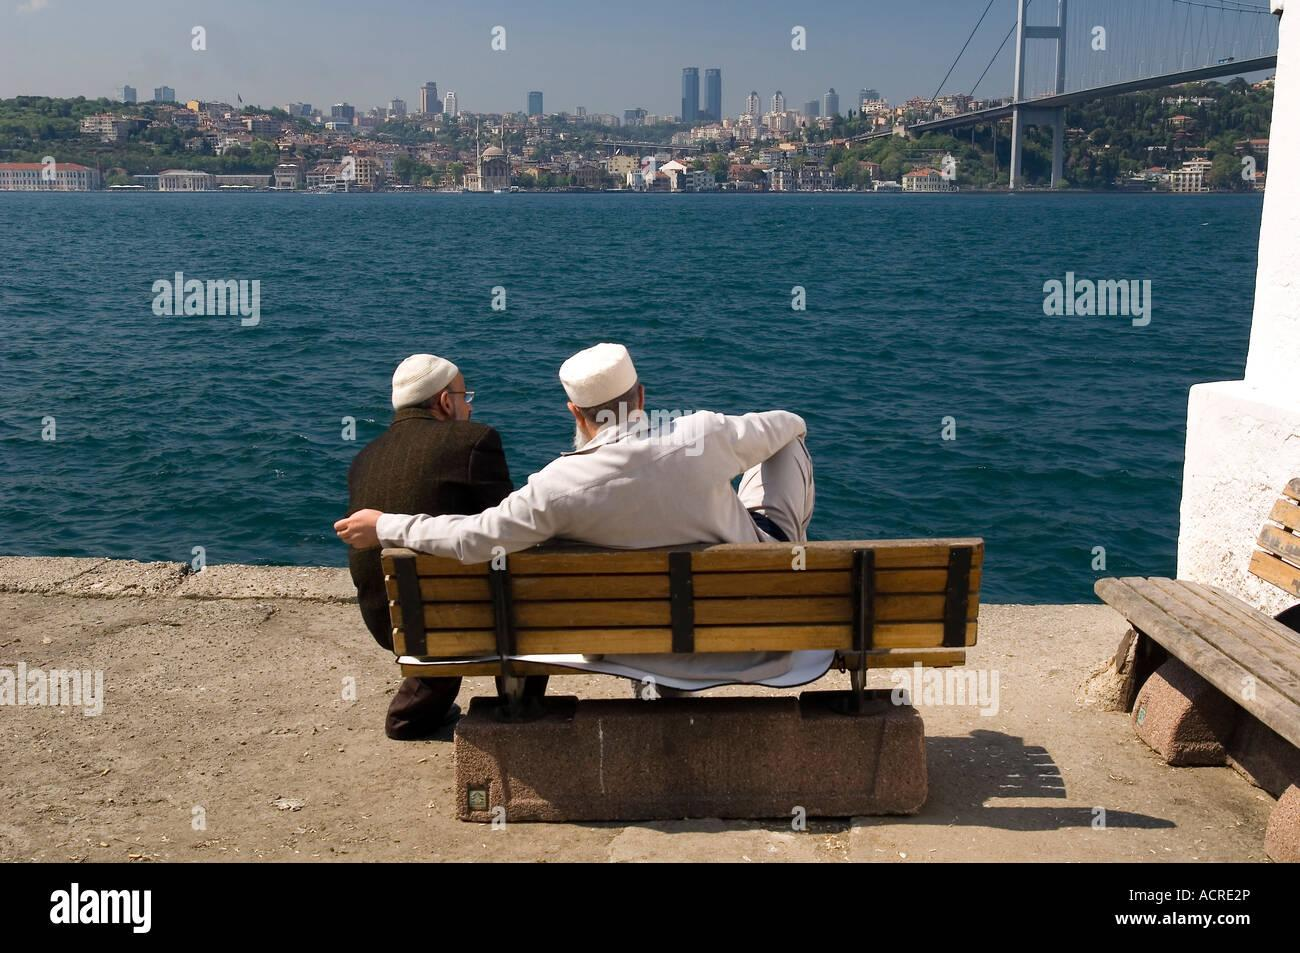

benchinistanbul5.jpeg


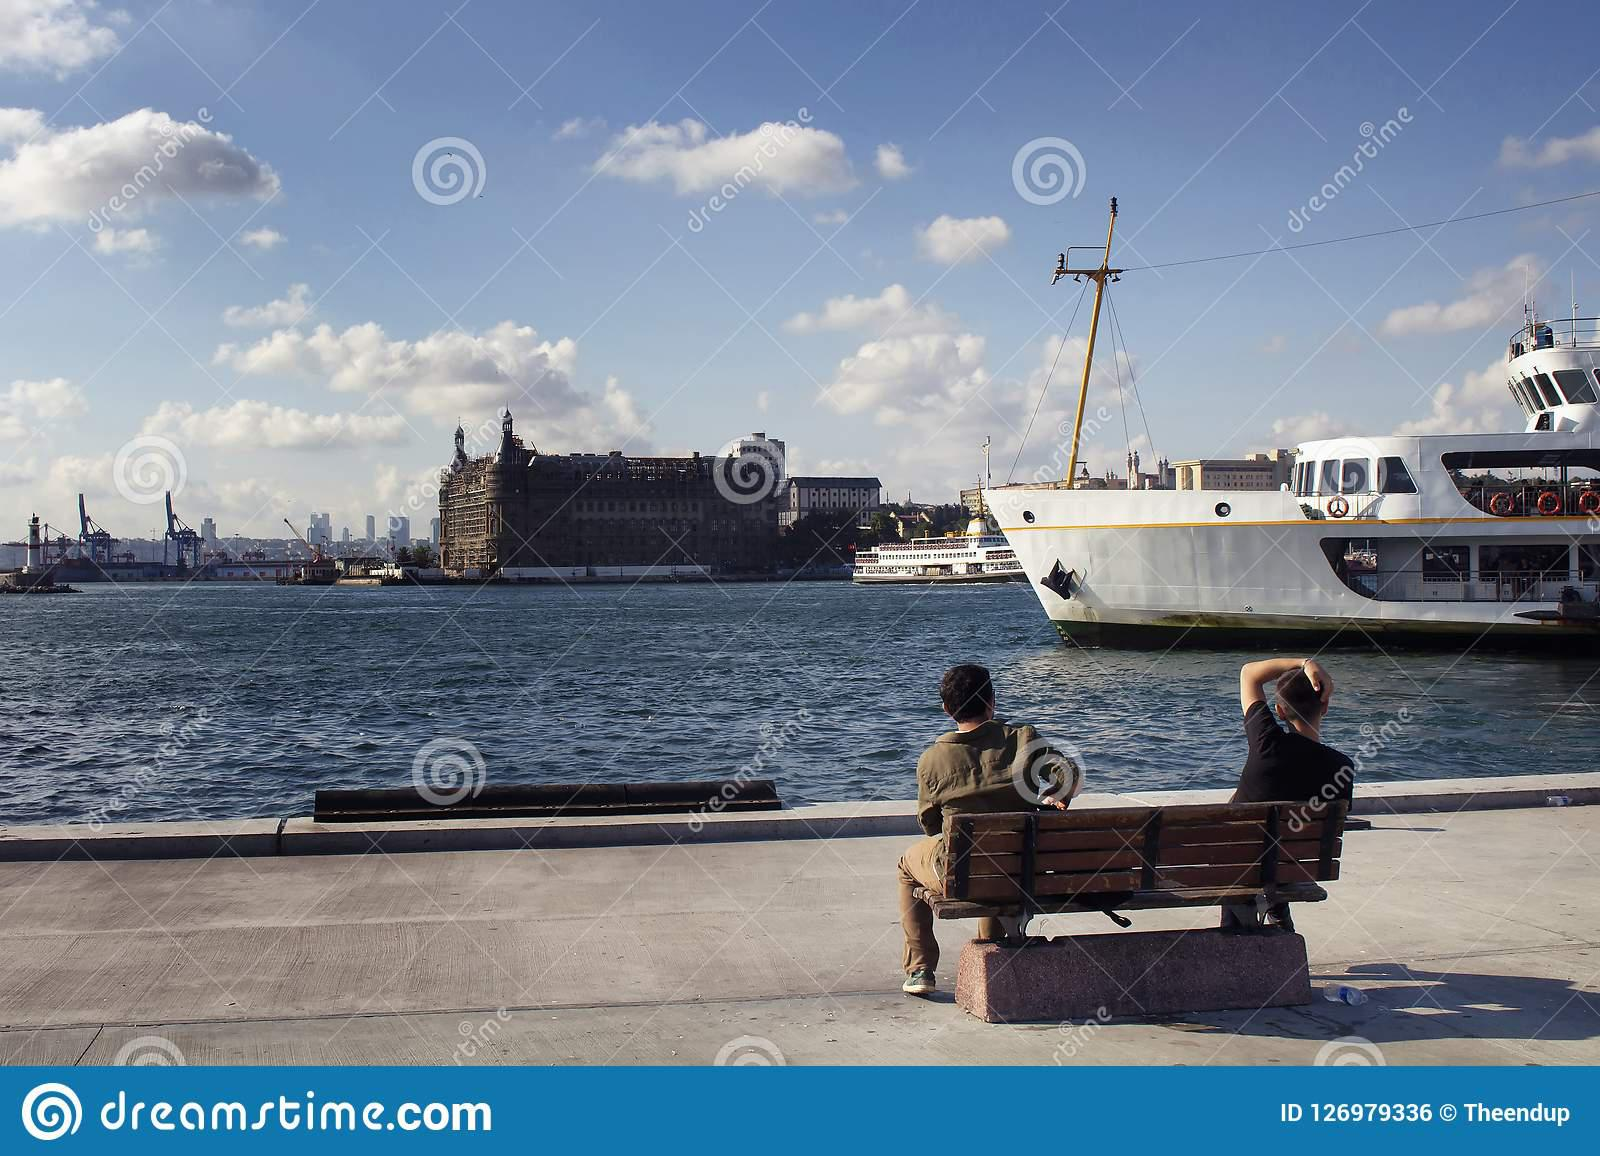

benchinistanbul107.jpeg


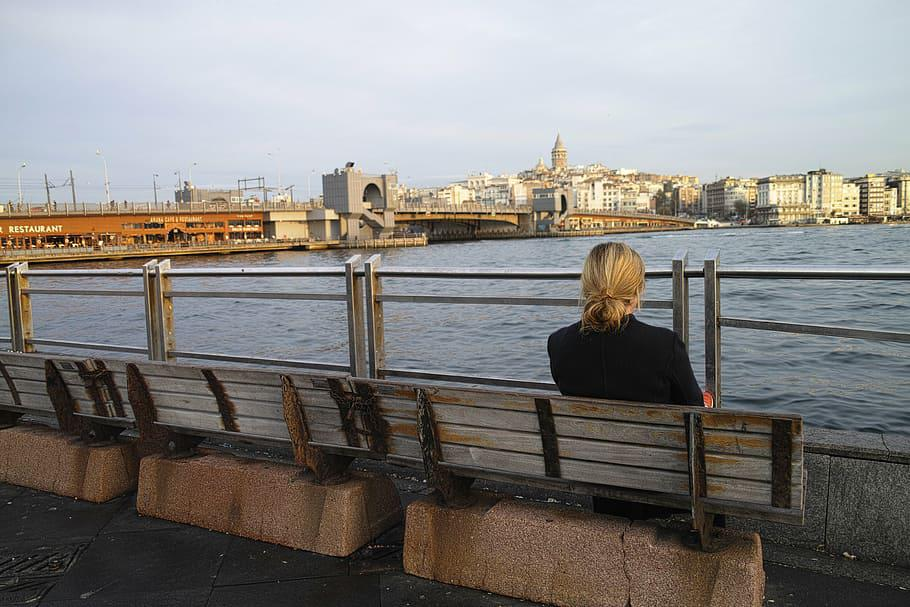

In [ ]:
showNearestNeighbours(8, indices, benchFiles, '/content/drive/MyDrive/Colab Notebooks/04_DesignAlgorithms/bench_in_istanbul')

In [ ]:
distances

array([[0.0000000e+00, 2.2789425e+01, 2.3314463e+01, ..., 2.4082724e+01,
        2.4218321e+01, 2.4226593e+01],
       [6.7434956e-07, 2.5154495e+01, 2.5237202e+01, ..., 2.5747124e+01,
        2.5876560e+01, 2.5952642e+01],
       [8.2590617e-07, 2.3288788e+01, 2.3681263e+01, ..., 2.7197109e+01,
        2.7786448e+01, 2.7968786e+01],
       ...,
       [0.0000000e+00, 1.8076918e+01, 2.3571672e+01, ..., 2.4292196e+01,
        2.4315897e+01, 2.4407925e+01],
       [6.7434956e-07, 2.6732550e+01, 2.7071260e+01, ..., 2.7597771e+01,
        2.7651516e+01, 2.7672297e+01],
       [0.0000000e+00, 1.9708967e+01, 2.2965273e+01, ..., 2.6883636e+01,
        2.7278135e+01, 2.7317278e+01]], dtype=float32)

In [ ]:
G = nx.Graph()

In [ ]:
for be in benchFiles:
    G.add_node(be)

In [ ]:
def createEdges(indices, files, distances):
    weightedEdges = []
    for i in range(len(indices)):
        index = indices[i]
        dist = distances[i][1:]
        
        node = files[index[0]]
        
        edges = []
        print(dist)
        for e in index[1:]:
            edges.append(files[e])
        
        for i in range(len(edges)):
            weightedEdges.append((node, edges[i], dist[i]))
    
    return weightedEdges

In [ ]:
edges = createEdges (indices, benchFiles, distances)

[22.789425 23.314463 23.338007 23.602571 24.082724 24.21832  24.226593]
[25.154495 25.237202 25.237202 25.267807 25.747124 25.87656  25.952642]
[23.288788 23.681263 24.229109 26.439735 27.19711  27.786448 27.968786]
[21.832542 22.51287  22.764381 22.789425 23.5905   23.868635 24.213793]
[24.90018  25.181149 25.946308 26.156275 26.163841 26.76379  26.820414]
[23.345335 24.976204 26.197474 27.18621  27.909739 27.913883 27.965725]
[23.61043  24.741531 25.181149 25.55152  25.584219 25.809637 26.13285 ]
[24.194387 24.547068 24.621365 24.682158 25.270231 25.35116  25.628641]
[24.389479 24.58892  24.62612  25.02333  25.064024 25.776201 26.074736]
[24.976204 26.588842 27.606018 28.651375 28.923645 29.1307   29.278124]
[23.914274 23.9145   24.208456 24.213793 24.472652 24.698725 24.844917]
[22.12115  22.564167 24.199003 24.576986 25.080046 25.183336 25.187334]
[24.960793 25.28406  25.603922 25.7073   25.769575 25.777012 26.042107]
[23.258835 23.41994  24.339882 25.449324 25.678064 26.226591 26.

In [ ]:
edges

[('benchinistanbul0.jpeg', 'benchinistanbul3.jpeg', 22.789425),
 ('benchinistanbul0.jpeg', 'benchinistanbul18.jpeg', 23.314463),
 ('benchinistanbul0.jpeg', 'benchinistanbul30.jpeg', 23.338007),
 ('benchinistanbul0.jpeg', 'benchinistanbul174.jpeg', 23.602571),
 ('benchinistanbul0.jpeg', 'benchinistanbul158.jpeg', 24.082724),
 ('benchinistanbul0.jpeg', 'benchinistanbul188.jpeg', 24.21832),
 ('benchinistanbul0.jpeg', 'benchinistanbul118.jpeg', 24.226593),
 ('benchinistanbul1.jpeg', 'benchinistanbul49.jpeg', 25.154495),
 ('benchinistanbul1.jpeg', 'benchinistanbul23.jpeg', 25.237202),
 ('benchinistanbul1.jpeg', 'benchinistanbul24.jpeg', 25.237202),
 ('benchinistanbul1.jpeg', 'benchinistanbul115.jpeg', 25.267807),
 ('benchinistanbul1.jpeg', 'benchinistanbul5.jpeg', 25.747124),
 ('benchinistanbul1.jpeg', 'benchinistanbul188.jpeg', 25.87656),
 ('benchinistanbul1.jpeg', 'benchinistanbul10.jpeg', 25.952642),
 ('benchinistanbul2.jpeg', 'benchinistanbul65.jpeg', 23.288788),
 ('benchinistanbul2.jpe

In [ ]:
G.add_weighted_edges_from(edges)

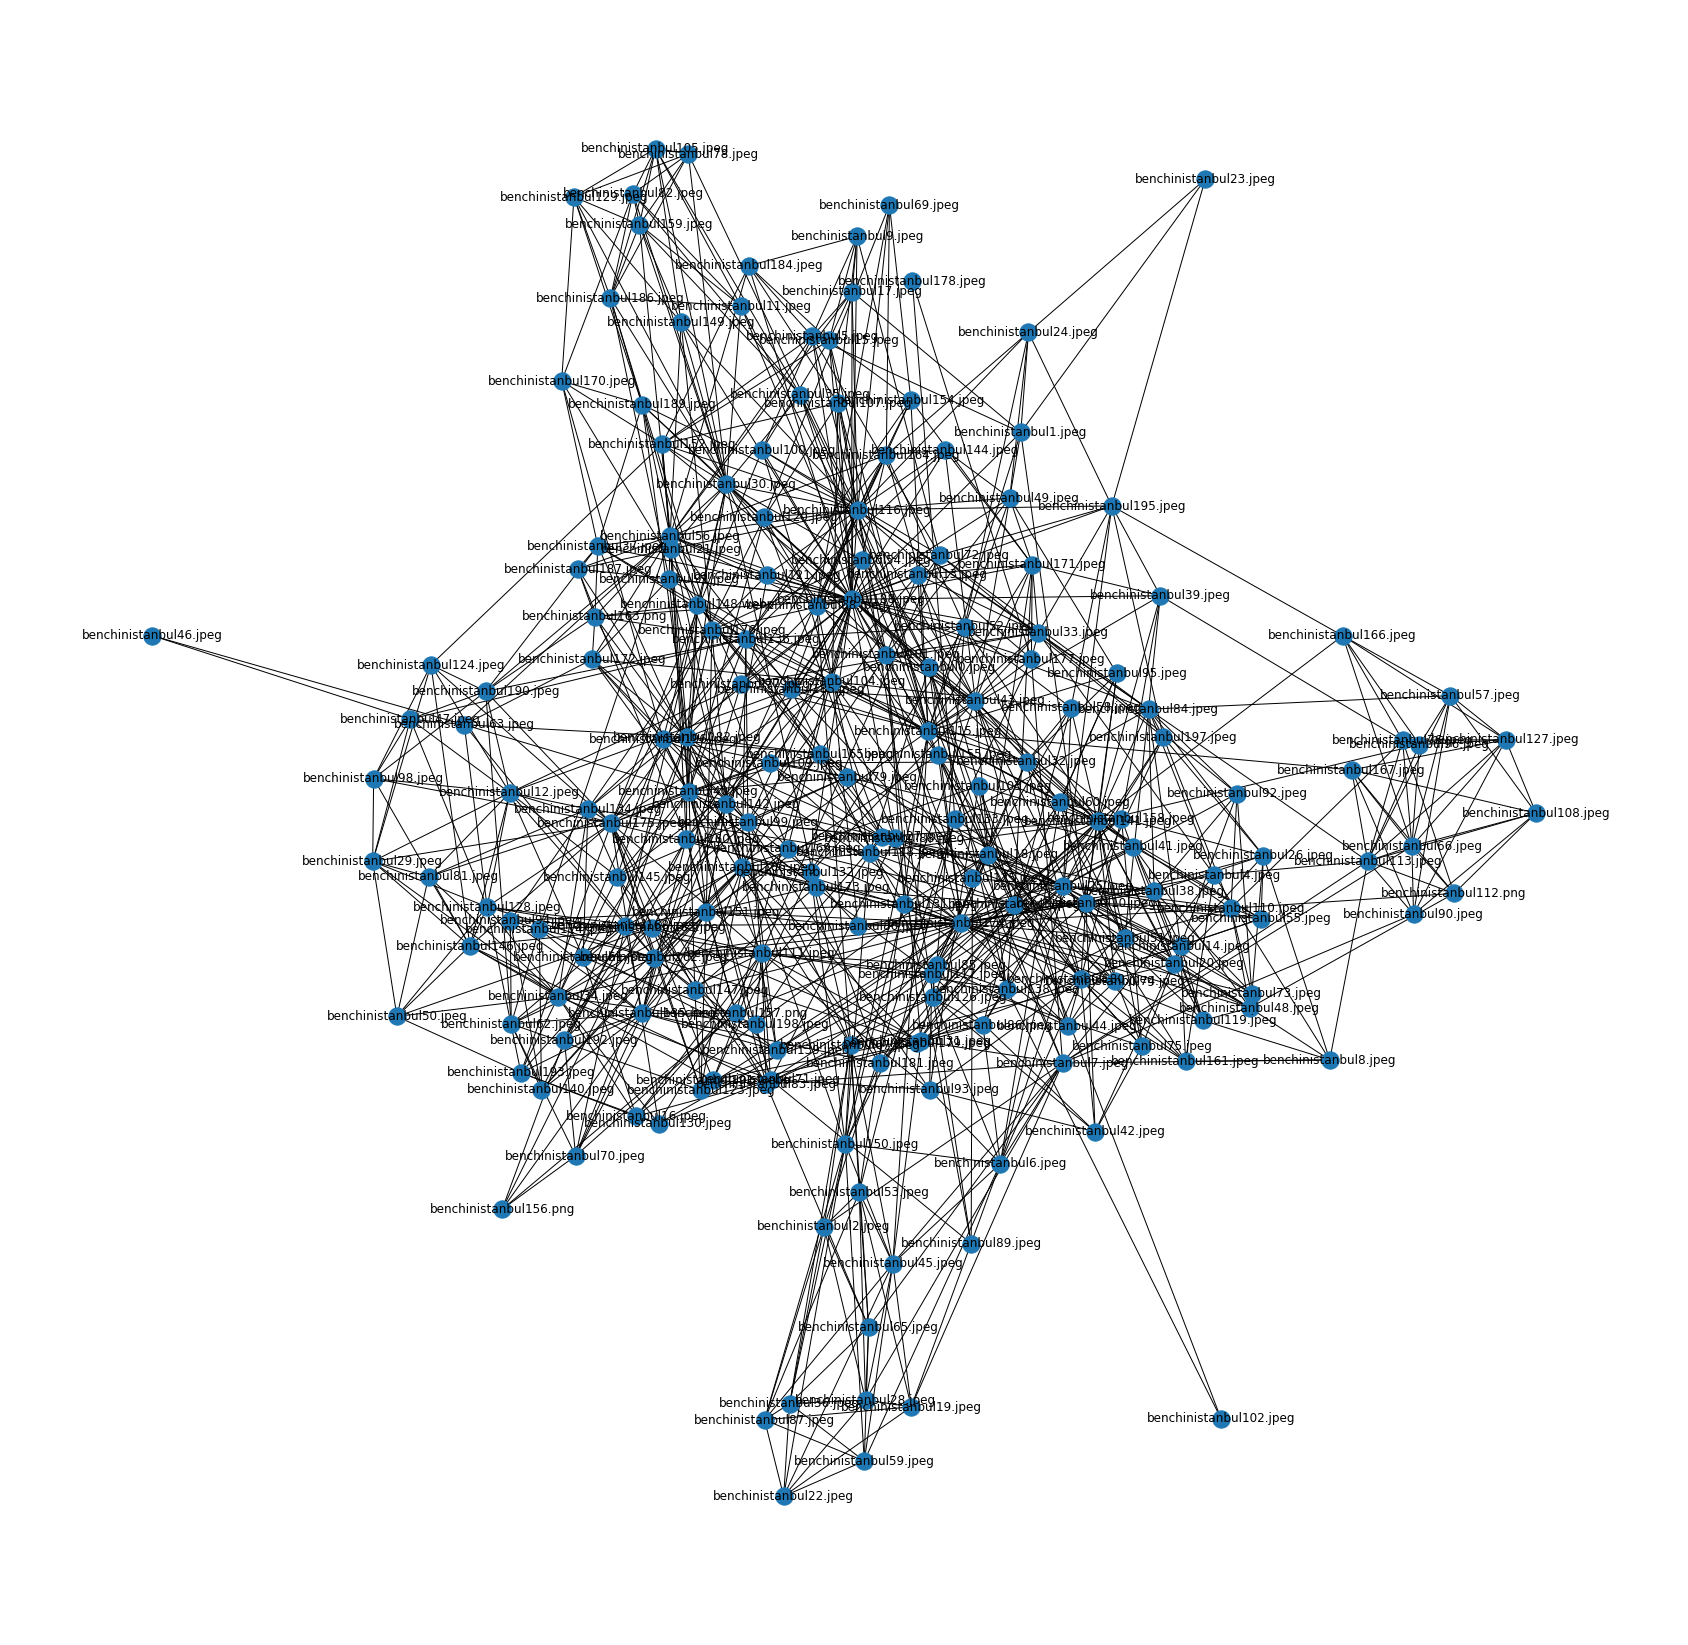

In [ ]:
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(G, with_labels=True)

In [ ]:
T = nx.minimum_spanning_tree(G)

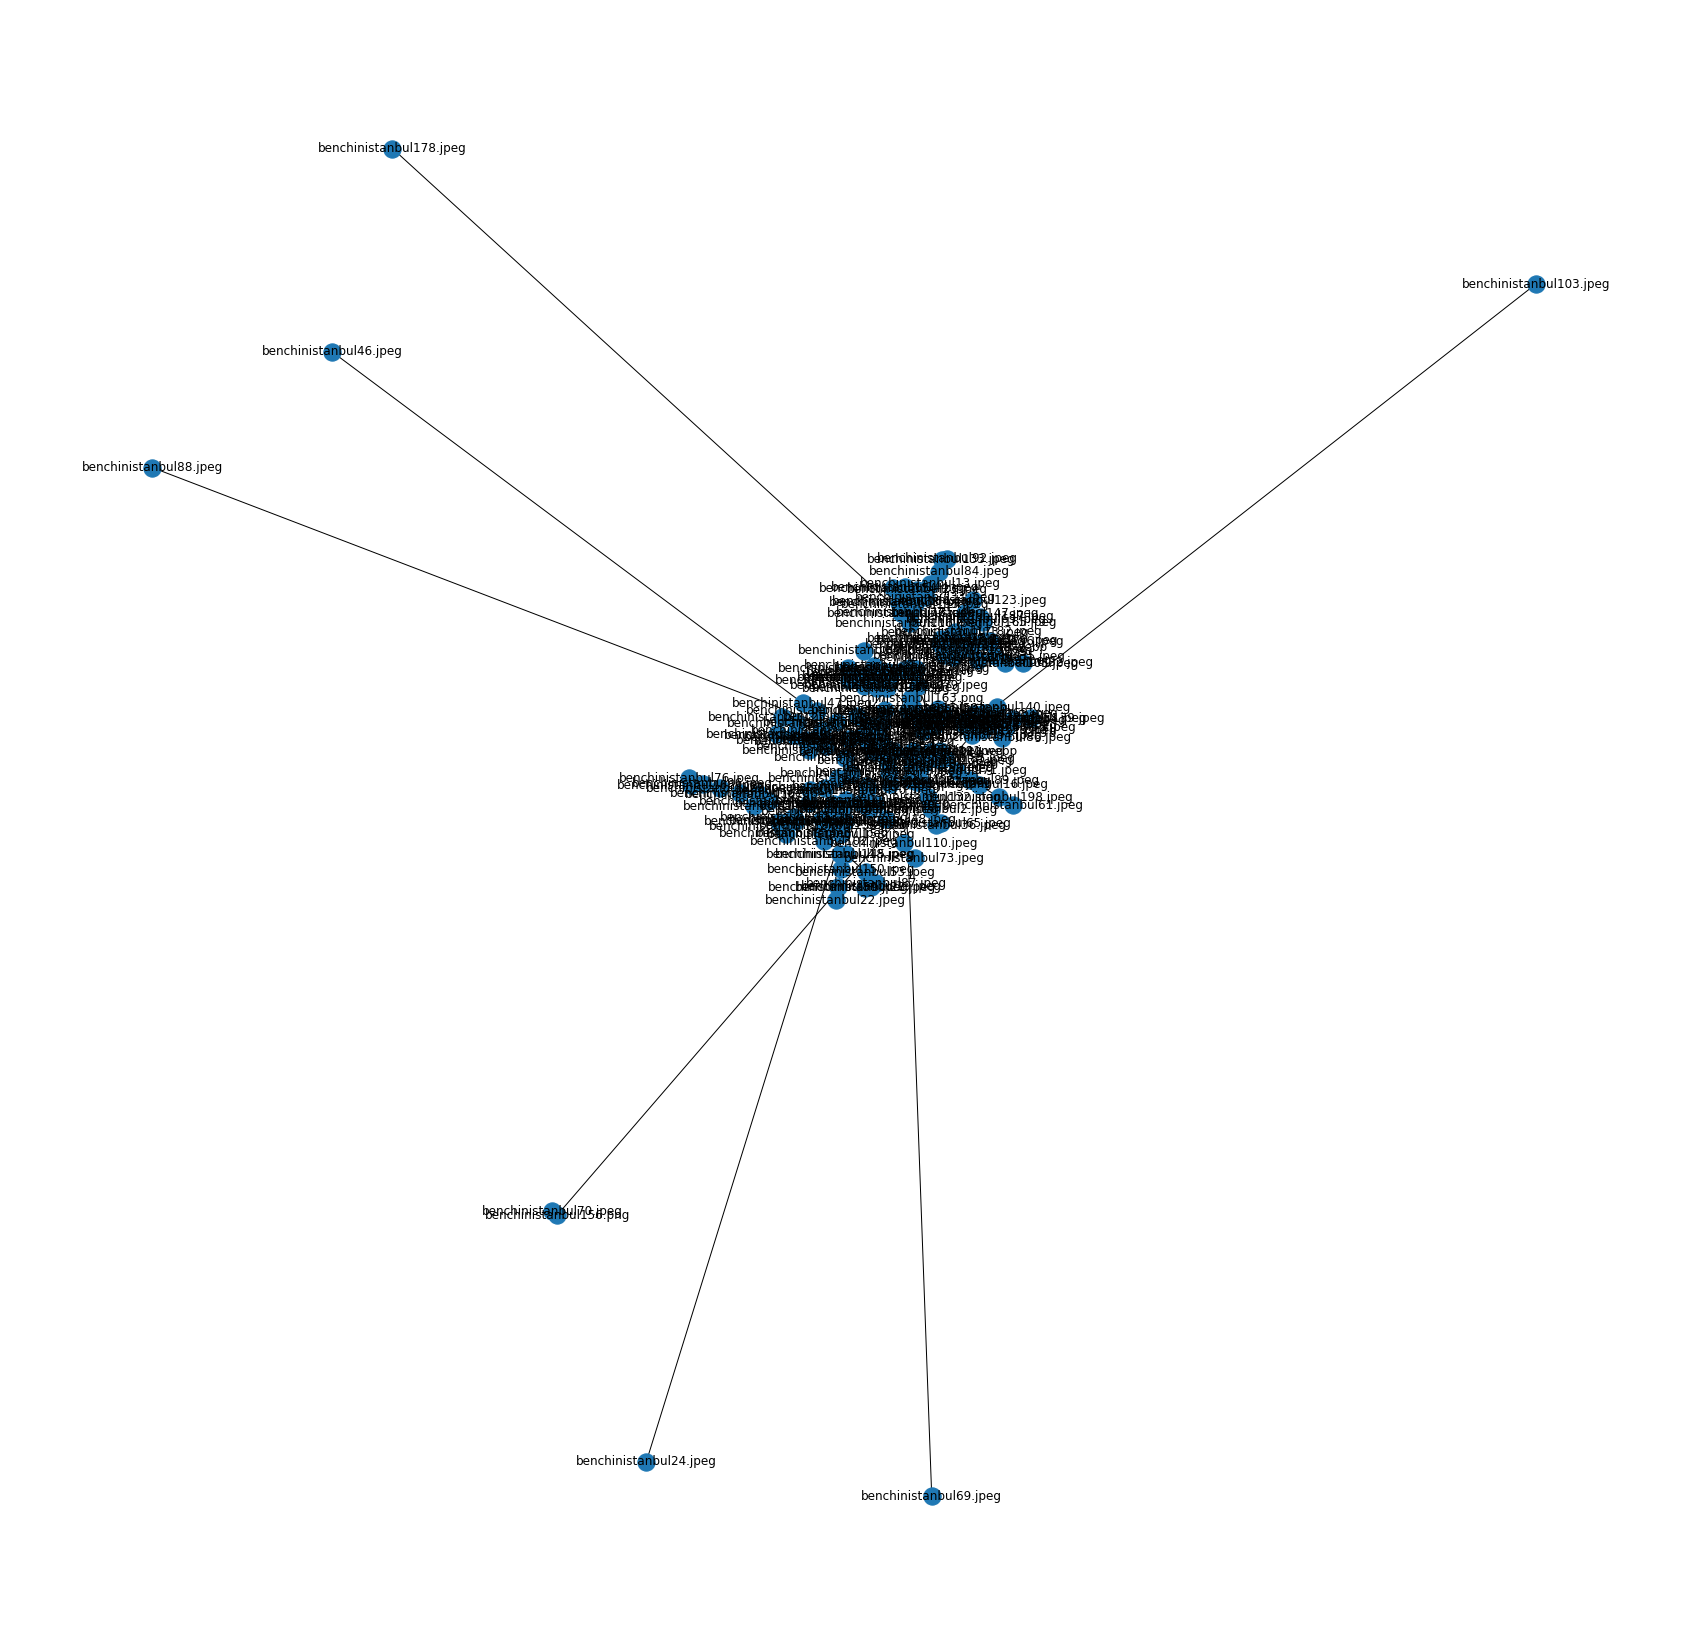

In [ ]:
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(T, with_labels=True)

# Evaluate locations from only digital data

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
coords = []
colours = []
with open('/content/drive/MyDrive/Colab Notebooks/04_DesignAlgorithms/flickrCoordinates2.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for r in reader:
        colour = [int(r[2][i:i+2], 16) for i in (0, 2, 4)]
        colours.append(colour)
        
        coords.append([eval(r[0]), eval(r[1])])
        

In [ ]:
len(coords)

50000

In [ ]:
coords = np.array(coords)

In [ ]:
coords[0]

array([45.429294, 12.343171])

In [ ]:
colours = np.array(colours)

In [ ]:
lim_coord = [45.41, 12.27, 45.46, 12.39]

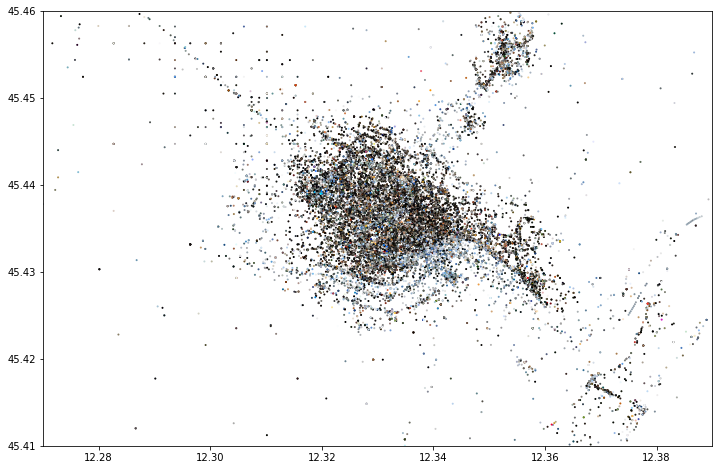

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
plt.ylim([lim_coord[0], lim_coord[2]])
plt.xlim([lim_coord[1], lim_coord[3]])
plt.show()

In [ ]:
lim_coord = [45.41, 12.3, 45.46, 12.35]

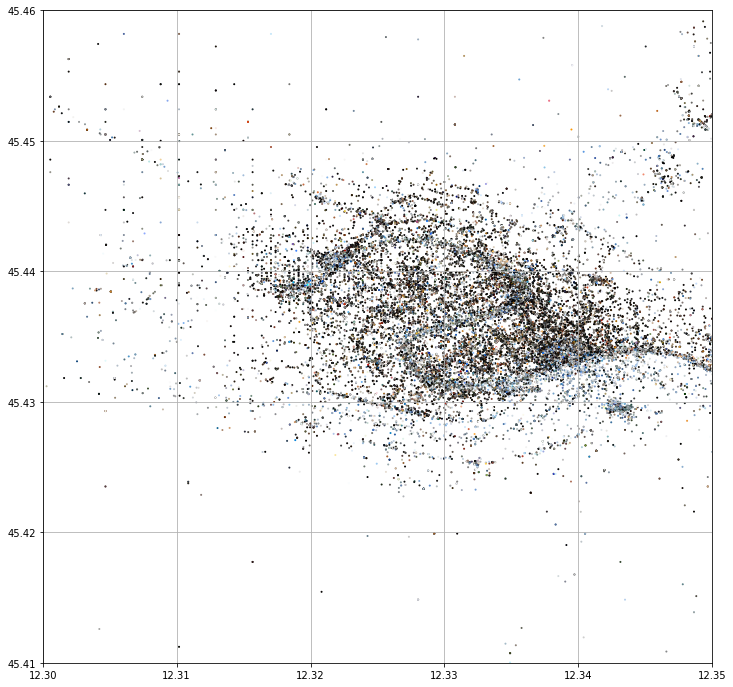

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
ax.grid(True)
plt.ylim([lim_coord[0], lim_coord[2]])
plt.xlim([lim_coord[1], lim_coord[3]])
plt.show()

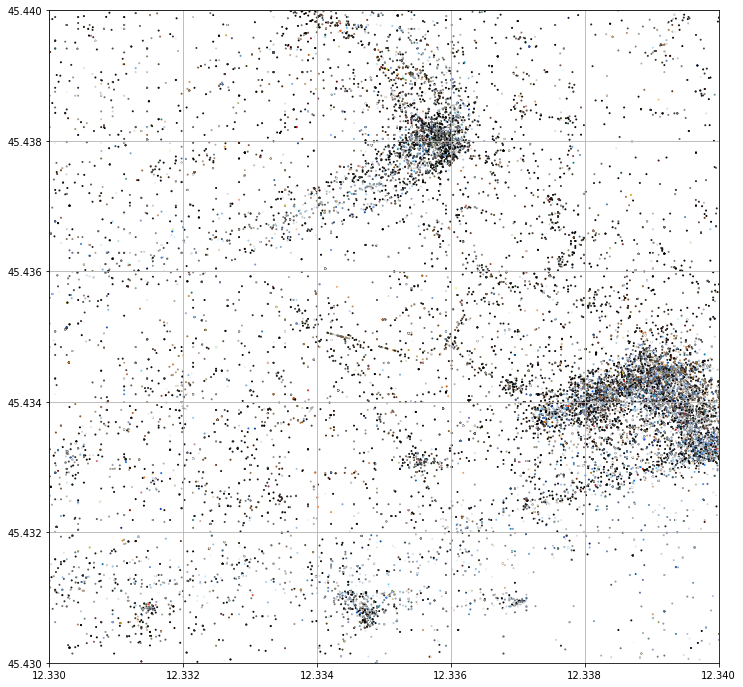

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
ax.grid(True)
plt.ylim([45.43, 45.44])
plt.xlim([12.33,12.34])
plt.show()

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
def testIfUniform(latrange, lonrange, coordinates):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and 
            lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    
    pointsInRange = np.asarray(pointsInRange)
    scaler = MinMaxScaler()
    normalised = scaler.fit_transform(pointsInRange)
    print(stats.kstest(normalised[:,0], 'uniform'))
    print(stats.kstest(normalised[:,1], 'uniform'))
    

In [ ]:
testIfUniform([45.43, 45.44], [12.33,12.34], coords)

KstestResult(statistic=0.16535934289443233, pvalue=0.0)
KstestResult(statistic=0.27126120825472594, pvalue=0.0)


In [ ]:
testIfUniform([45.43, 45.432], [12.33,12.332], coords)

KstestResult(statistic=0.14698388860550907, pvalue=1.774478031226369e-09)
KstestResult(statistic=0.15796515015064194, pvalue=6.942005575754682e-11)


# Now let's start giving it a return value so that we can start using it

In [ ]:
def testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and 
            lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    
    if len(pointsInRange) > 2 and min(latrange[1]-latrange[0], lonrange[1]-lonrange[0]) > 0.00005:
        points = np.asarray(pointsInRange)
        scaler = MinMaxScaler()
        normalised = scaler.fit_transform(pointsInRange)
        
        xKS = stats.kstest(normalised[:,0], 'uniform')
        yKS = stats.kstest(normalised[:,1], 'uniform')
        
        if xKS[0] < statThresh and yKS[0] < statThresh and xKS[1] > pThresh and yKS[1] > pThresh:
            return True, pointsInRange
        else:
            return False, pointsInRange
        
    else:
        return True, pointsInRange

In [ ]:
def evaluate(latrange, lonrange, coordinates, statThresh = 0.7, pThresh = 0.05):
    uniform, inrange = testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh)
    latdiff = latrange[1]-latrange[0]
    londiff = lonrange[1]-lonrange[0]
    
    if uniform:
        return [(latrange[0], lonrange[0]), (latdiff, londiff), inrange]
    else:
        a = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        b = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        c = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        d = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        
        return[a,b,c,d]

In [ ]:
def unpack(tree, squares):
    if len(tree) == 4:
        for t in tree:
            unpack(t, squares)
    else:
        squares.append(tree)

In [ ]:
squares = evaluate([45.43, 45.44], [12.33,12.34], coords, statThresh = 0.8, pThresh = 0.01)

In [ ]:
len(squares)

4

In [ ]:
squares

[[[[[(45.43, 12.33),
     (0.000625000000006537, 0.0006250000000012079),
     [array([45.430443, 12.330565]),
      array([45.430239, 12.330393]),
      array([45.430578, 12.330479]),
      array([45.430578, 12.330479]),
      array([45.430586, 12.330431]),
      array([45.430301, 12.330565]),
      array([45.430142, 12.33035 ]),
      array([45.430232, 12.330307]),
      array([45.430232, 12.330307]),
      array([45.430232, 12.330307]),
      array([45.430232, 12.330307]),
      array([45.430232, 12.330307]),
      array([45.430232, 12.330307]),
      array([45.430232, 12.330307]),
      array([45.430262, 12.330436]),
      array([45.430623, 12.330093]),
      array([45.430271, 12.330286])]],
    [[(45.430625000000006, 12.33),
      (0.0003124999999997158, 0.00031250000000149214),
      [array([45.430864, 12.330265]),
       array([45.430864, 12.330265]),
       array([45.430869, 12.3302  ]),
       array([45.430902, 12.330114]),
       array([45.430827, 12.330055])]],
     [(45.4309

In [ ]:
blocks = []
unpack(squares, blocks)

In [ ]:
len(blocks)

4054

In [ ]:
blocks[0]

[(45.43, 12.33),
 (0.000625000000006537, 0.0006250000000012079),
 [array([45.430443, 12.330565]),
  array([45.430239, 12.330393]),
  array([45.430578, 12.330479]),
  array([45.430578, 12.330479]),
  array([45.430586, 12.330431]),
  array([45.430301, 12.330565]),
  array([45.430142, 12.33035 ]),
  array([45.430232, 12.330307]),
  array([45.430232, 12.330307]),
  array([45.430232, 12.330307]),
  array([45.430232, 12.330307]),
  array([45.430232, 12.330307]),
  array([45.430232, 12.330307]),
  array([45.430232, 12.330307]),
  array([45.430262, 12.330436]),
  array([45.430623, 12.330093]),
  array([45.430271, 12.330286])]]

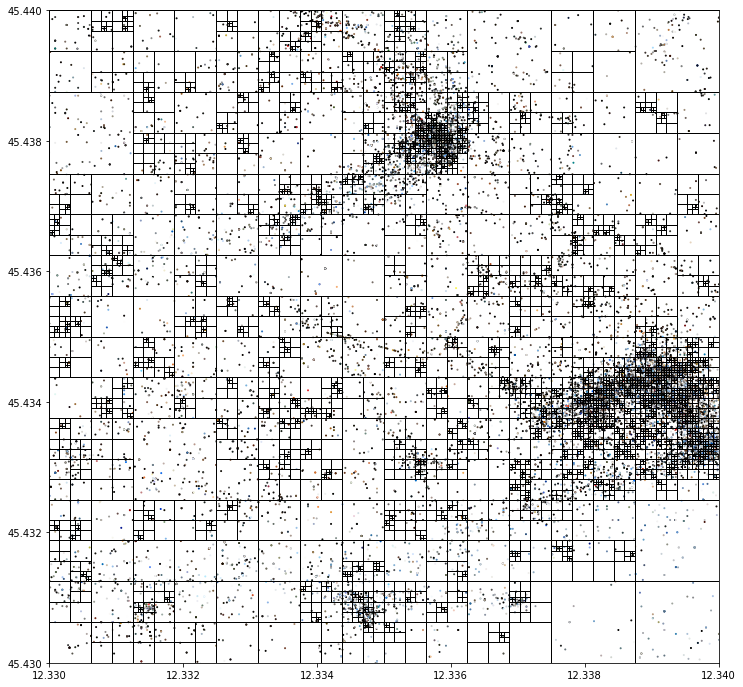

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
for b in blocks:
    ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                           edgecolor = 'black',
                           fill=False,lw=1))
plt.ylim([45.43, 45.44])
plt.xlim([12.33,12.34])
plt.show()